This file is focused on exploring the dataset as described in https://uoregonctn.atlassian.net/wiki/spaces/DE/pages/1763344385/TESQ-E.

So first we would like to take a look at the averages of the betas of CorrectStop and CorrectGo...

In [1]:
from nltools import Brain_Data
from scipy.stats import ttest_ind
from nltools import expand_mask
import sys
import os
import pandas as pd

sys.path.append(os.path.abspath("../../ml/"))

from apply_loocv_and_save import *
import gc
import nibabel as nib

nonbids_data_path = "/gpfs/projects/sanlab/shared/DEV/nonbids_data/"
ml_data_folderpath = "/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml"
train_test_markers_filepath = ml_data_folderpath + "/train_test_markers_20210601T183243.csv"

all_sst_events= pd.read_csv(ml_data_folderpath +"/SST/" + "all_sst_events.csv")

script_path = '/gpfs/projects/sanlab/shared/DEV/DEV_scripts/fMRI/ml'


brain_data_filepath = ml_data_folderpath + "/SST/Brain_Data_betaseries_40subs_correct_cond.pkl"

python initialized for apply_loocv_and_save
4


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
bd=pickle.load(open(brain_data_filepath,'rb'))
bd.X

,onset,duration,trial_type,subject,wave,beta
256,0.00000,2.25834,correct-stop,DEV005,wave1,beta_0001.nii
258,2.75834,0.40082,correct-go,DEV005,wave1,beta_0003.nii
260,5.51390,0.66191,correct-go,DEV005,wave1,beta_0005.nii
264,12.52780,0.51712,correct-go,DEV005,wave1,beta_0009.nii
266,15.90975,0.39906,correct-go,DEV005,wave1,beta_0011.nii
...,...,...,...,...,...,...
13810,400.61111,0.42714,correct-go,DEV057,wave1,beta_0243.nii
13812,404.11667,0.55843,correct-go,DEV057,wave1,beta_0245.nii
13814,407.24723,0.44220,correct-go,DEV057,wave1,beta_0247.nii
13818,412.44516,0.54779,correct-go,DEV057,wave1,beta_0251.nii


In [8]:
bd_correct_stop = bd[bd.X.trial_type=='correct-stop'].mean()

Plotting unthresholded image


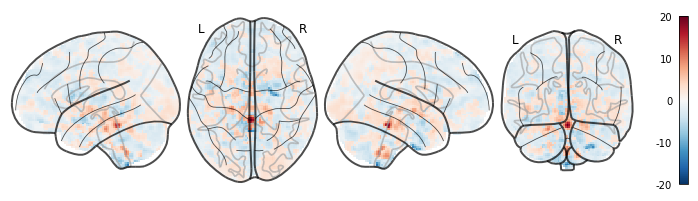

In [9]:
bd_correct_stop.plot(view='glass')

Plotting unthresholded image


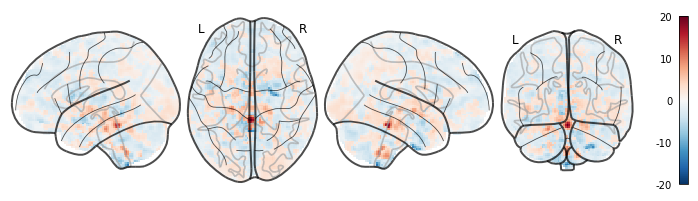

In [10]:
bd_correct_stop.plot(view='glass')

In [11]:
bd_correct_go = bd[bd.X.trial_type=='correct-go'].mean()

Plotting unthresholded image


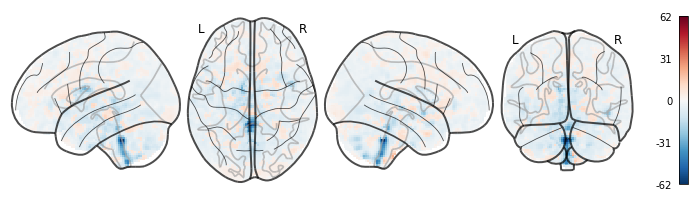

In [12]:
bd_correct_go.plot(view='glass')

In [13]:
from nltools import mask
from dev_wtp_io_utils import *

In [4]:
ml_data_folderpath

'/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml'

In [5]:
mask_binarized = create_mask_from_images(get_pfc_image_filepaths(ml_data_folderpath + "/"),threshold=10)

Plotting unthresholded image


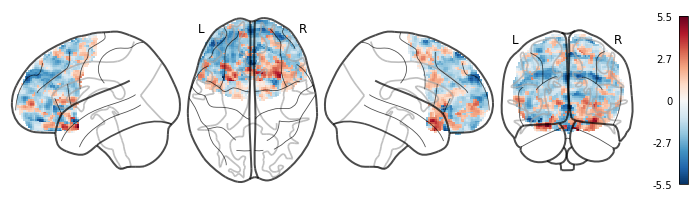

In [14]:
bd_correct_stop.apply_mask(mask_binarized).plot(view='glass')

Plotting unthresholded image


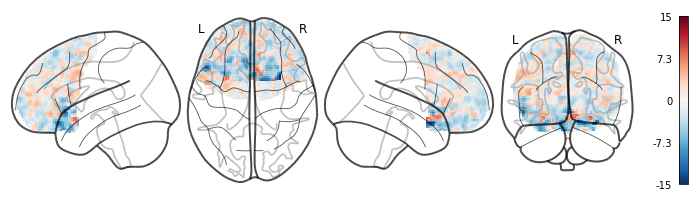

In [15]:
bd_correct_go.apply_mask(mask_binarized).plot(view='glass')

What if we trained on distinguishing go vs. stop, and then used _that_ as a neural signature of task response inhibition across subjects?

subjects will naturally differ across the task as to how much their average signal responds to that, and the ones with better response might have better reponse inhibition.

Then try the same method, but taking a regression of SSRT, and then seeing how subjects map to that. Though we actually have tried regressing on SSRT, and found it didn't work very well. If that didn't work very well, then probably we can't use it to classify subjects.

Think we need to at least finish off a good set of the RSA before we move forward. Make sure there aren't things we missed.